# Random Forest Classification

## Data

+ We will be working with the Palmer Penguins data set and the popular banknote authenticatio data set from UC Irvine ML Data Repository
+ Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

+ Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

+ **Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/penguins_size.csv')

In [2]:
df = df.dropna()
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Getting the variables separated from the label which is the species

X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True) # using get_dummies to 
y = df['species'] # the label

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Random Forest Classification

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# help(RandomForestClassifier) # exploring the parameters available

In [9]:
# Use 10 random trees

model = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state = 101)

In [11]:
# fitting the model to our training data

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
# predicting the species on X_test

preds = model.predict(X_test)

In [15]:
# taking a quick look at the labels stores under preds

preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

## Evaluation

In [16]:
# importing tools needed to evaluate our model
# this includes the confusion matrix, accuracy score, a visualization of the confusin matrix and a classification report

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [17]:
confusion_matrix(y_test, preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

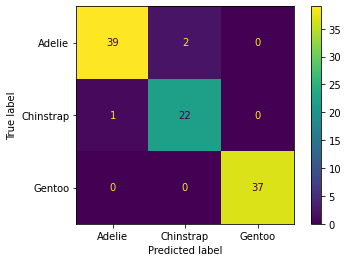

In [18]:
plot_confusion_matrix(model, X_test, y_test)

## Observations

+ There are a total of 3 misclassified Penguins (1 for Chinstrap, 2 for Adelie)
+ The 2 Adelie were classified as Chinstrap, and the Chinstrap was classified as an Adelie

In [20]:
# printing out the classification report
# since there were only 3 misclassified penguins, the assumption for the classification report is to be performing well

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



## Feature Importance

In [ ]:
model.feature_importances_

In [ ]:
test_error = [] # creating an empty list

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

In [ ]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

### Banknote Authetication Dataset

+ Real and fake bills scanned and a wavelet transformation was performed on the image

### Banknote Authentication Dataset Features

+ Variance of Wavelet Transformation
+ Skewness of Wavelet Transformation
+ Curtosis of Wavelet Transformation
+ Entropy of Image